In [1]:
import pandas as pd

# Load Excel file
df = pd.read_excel("Bookings.xlsx")

# Inspect
print("Shape:", df.shape)
print(df.head())
print(df.info())
print(df.describe(include='all'))

Shape: (103024, 20)
                 Date      Time     Booking_ID        Booking_Status  \
0 2024-07-26 14:00:00  14:00:00  CNR7153255142    Canceled by Driver   
1 2024-07-25 22:20:00  22:20:00  CNR2940424040               Success   
2 2024-07-30 19:59:00  19:59:00  CNR2982357879               Success   
3 2024-07-22 03:15:00  03:15:00  CNR2395710036  Canceled by Customer   
4 2024-07-02 09:02:00  09:02:00  CNR1797421769               Success   

  Customer_ID Vehicle_Type Pickup_Location Drop_Location  V_TAT  C_TAT  \
0   CID713523  Prime Sedan     Tumkur Road      RT Nagar    NaN    NaN   
1   CID225428         Bike     Magadi Road       Varthur  203.0   30.0   
2   CID270156    Prime SUV   Sahakar Nagar       Varthur  238.0  130.0   
3   CID581320        eBike      HSR Layout   Vijayanagar    NaN    NaN   
4   CID939555         Mini     Rajajinagar   Chamarajpet  252.0   80.0   

                     Canceled_Rides_by_Customer      Canceled_Rides_by_Driver  \
0                    

In [2]:
# Check raw values BEFORE any dropna
print("Unique values in Booking_Status:", df['Booking_Status'].unique())
print("Unique values in Vehicle_Type:", df['Vehicle_Type'].unique())
print("Unique values in Ride_Distance (sample):", df['Ride_Distance'].head(10))
print("Unique values in Customer_Rating (sample):", df['Customer_Rating'].head(10))


Unique values in Booking_Status: ['Canceled by Driver' 'Success' 'Canceled by Customer' 'Driver Not Found']
Unique values in Vehicle_Type: ['Prime Sedan' 'Bike' 'Prime SUV' 'eBike' 'Mini' 'Prime Plus' 'Auto']
Unique values in Ride_Distance (sample): 0     0
1    13
2    40
3     0
4    45
5    41
6    49
7     0
8     0
9     0
Name: Ride_Distance, dtype: int64
Unique values in Customer_Rating (sample): 0    NaN
1    4.0
2    4.8
3    NaN
4    3.0
5    4.6
6    4.5
7    NaN
8    NaN
9    NaN
Name: Customer_Rating, dtype: float64


In [3]:
import numpy as np

# Clean string columns
df['Booking_Status'] = df['Booking_Status'].astype(str).str.strip().str.lower()
df['Vehicle_Type'] = df['Vehicle_Type'].astype(str).str.strip().str.lower()

# Replace blank-like strings and junk with np.nan
junk_values = ['', ' ', 'nan', 'none', 'null', 'n/a']
df.replace(junk_values, np.nan, inplace=True)

# Convert numeric columns safely
df['Ride_Distance'] = pd.to_numeric(df['Ride_Distance'], errors='coerce')
df['Customer_Rating'] = pd.to_numeric(df['Customer_Rating'], errors='coerce')
df['Driver_Ratings'] = pd.to_numeric(df['Driver_Ratings'], errors='coerce')
df['Booking_Value'] = pd.to_numeric(df['Booking_Value'], errors='coerce')


In [4]:
df.dropna(subset=['Date', 'Time', 'Booking_Status', 'Ride_Distance', 'Customer_Rating', 'Vehicle_Type'], inplace=True)


In [5]:
print("Shape after full clean:", df.shape)
print(df[['Booking_Status', 'Vehicle_Type', 'Ride_Distance', 'Customer_Rating']].head(10))


Shape after full clean: (63967, 20)
   Booking_Status Vehicle_Type  Ride_Distance  Customer_Rating
1         success         bike             13              4.0
2         success    prime suv             40              4.8
4         success         mini             45              3.0
5         success         mini             41              4.6
6         success         bike             49              4.5
10        success   prime plus             46              3.4
11        success   prime plus             18              4.4
12        success         auto              8              4.8
14        success         bike             18              4.1
15        success         bike             23              3.6


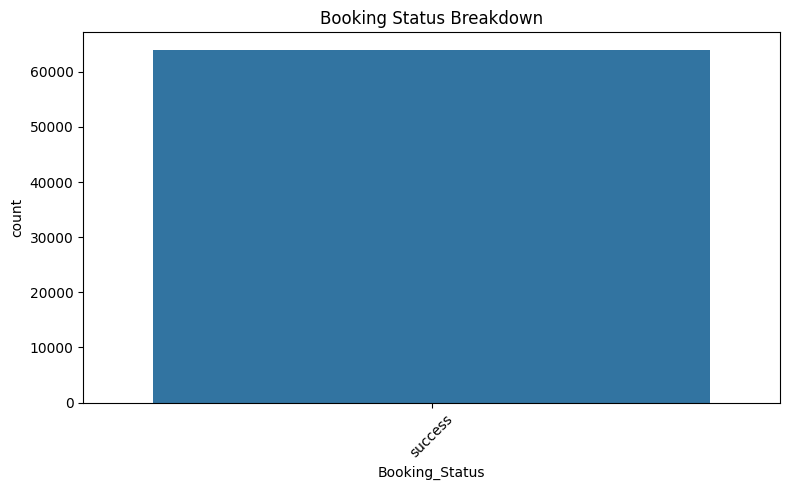

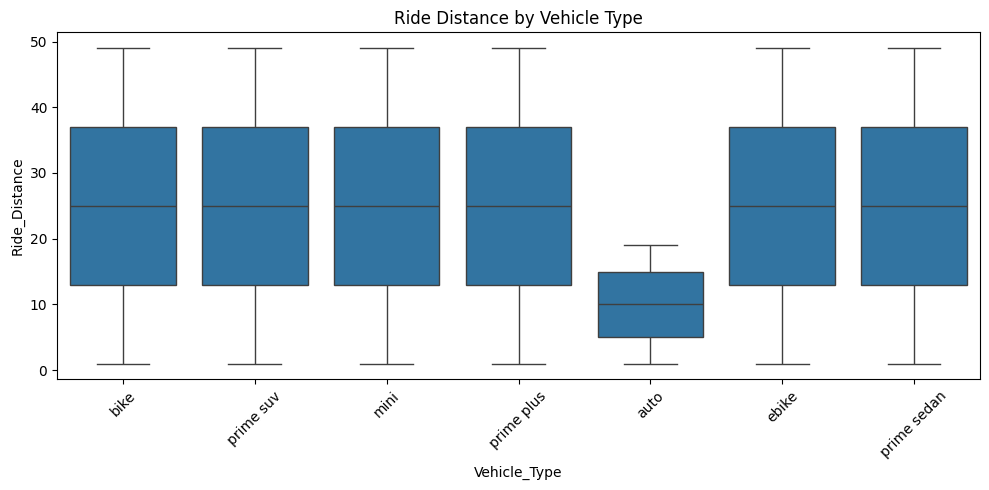

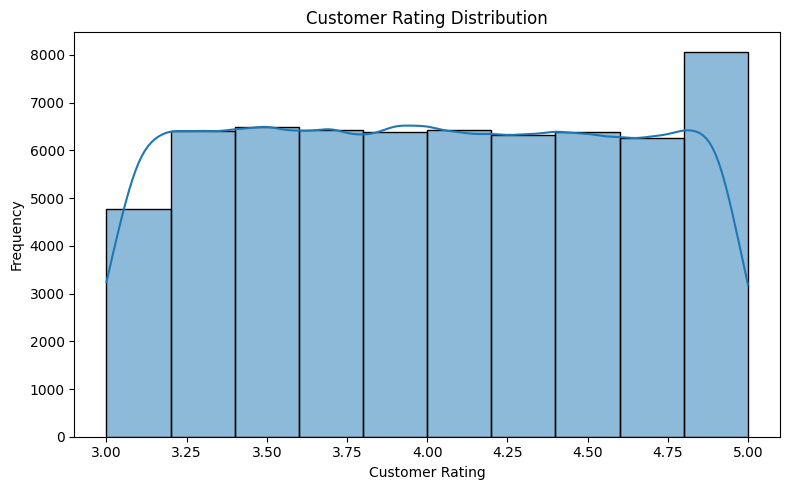

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Booking Status Count
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Booking_Status', order=df['Booking_Status'].value_counts().index)
plt.title('Booking Status Breakdown')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ride Distance by Vehicle Type
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Vehicle_Type', y='Ride_Distance')
plt.title('Ride Distance by Vehicle Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Customer Rating Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Customer_Rating'], bins=10, kde=True)
plt.title('Customer Rating Distribution')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [7]:
df.to_csv("cleaned_bookings.csv", index=False)
print("Exported cleaned data ✅ Rows:", df.shape[0])


Exported cleaned data ✅ Rows: 63967
